In [49]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import sys
from mpl_toolkits.basemap import Basemap
import plotly.plotly as py
py.sign_in(username='roudgarian', api_key='o4hQBxVInVrbRO5I0Cji')
from plotly.graph_objs import *
import warnings
import seaborn as sns

In [50]:
warnings.filterwarnings("ignore") 

In [71]:
training_df = pd.read_csv("trainingData.csv")
validation_df = pd.read_csv("validationData.csv")

In [4]:
#The unix time stamp is a way to track time as a running total of seconds. This count starts at the Unix Epoch 
#on January 1st, 1970 at UTC. Therefore, the unix time stamp is merely the number of seconds between a particular 
#date and the Unix Epoch
training_df['TIMESTAMP'] = pd.to_datetime(training_df['TIMESTAMP'] , unit='s')
validation_df['TIMESTAMP'] = pd.to_datetime(validation_df['TIMESTAMP'] , unit='s')

In [5]:
training_df['TIMESTAMP'].head()

0   2013-06-20 07:35:33
1   2013-06-20 07:34:51
2   2013-06-20 07:41:35
3   2013-06-20 07:36:47
4   2013-05-30 10:28:30
Name: TIMESTAMP, dtype: datetime64[ns]

In [143]:
trace1 = {
  "x":list(training_df['LONGITUDE']), 
  "y":list(training_df['LATITUDE']), 
  "z":list(training_df['FLOOR']), 
  "marker": {
    "color": training_df['BUILDINGID'], 
    "colorscale": "Viridis", 
    "opacity": 1, 
    "size": 4
  }, 
  "mode": "markers", 
  "name": "Plotly 3D plot", 
  "type": "scatter3d"
}

In [144]:
data = Data([trace1])
layout = {
  "scene": {
    "xaxis": {"title": "Longitude"}, 
    "yaxis": {"title": "Atitude"}, 
    "zaxis": {"title": "Floor"}
  }, 
  "title": "3D plot Wifi Location"
}

In [145]:
fig = Figure(data=data, layout=layout)
py.iplot(fig)

ValueError: 
    Invalid element(s) received for the 'color' property of scatter3d.marker
        Invalid elements include: ['bleu']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen
      - A number that will be interpreted as a color
        according to scatter3d.marker.colorscale
      - A list or array of any of the above

In [32]:
(training_df[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']]
.astype(str)
.describe(include=['object']))

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19937,19937,19937,19937,19937,19937
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5048,9492,484,16608,4516,4835


In [33]:
X_train = training_df.iloc[:,:520]

In [35]:
X_train = X_train[X_train.std()[X_train.std()!=0].index]

In [36]:
X_train = (X_train.replace(to_replace=100,value=np.nan))

In [37]:
X_stack = X_train.stack(dropna=False)

In [38]:
X_stack.head()

0  WAP001   NaN
   WAP002   NaN
   WAP005   NaN
   WAP006   NaN
   WAP007   NaN
dtype: float64

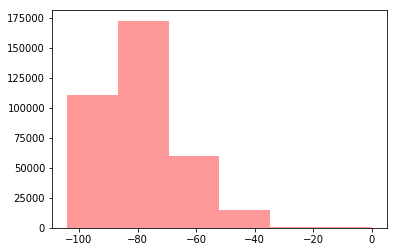

In [109]:
X_train = training_df.iloc[:,:520]
X_train = X_train[X_train.std()[X_train.std()!=0].index]
X_train = (X_train.replace(to_replace=100,value=np.nan))
X_train = X_train.stack(dropna=False)
sns.distplot(X_train.dropna(),kde = False, color='red')

In [78]:
df_B1=training_df.loc[training_df['BUILDINGID'] == 0]

In [80]:
df_B2=training_df.loc[training_df['BUILDINGID'] == 1]

In [81]:
df_B3=training_df.loc[training_df['BUILDINGID'] == 2]

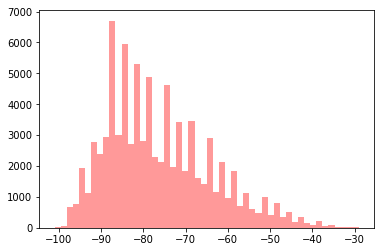

In [95]:
X_train_B1 = df_B1.iloc[:,:520]
X_train_B1 = X_train_B1[X_train_B1.std()[X_train_B1.std()!=0].index]
X_train_B1 = (X_train_B1.replace(to_replace=100,value=np.nan))
X_train_B1 = X_train_B1.stack(dropna=False)
sns.distplot(X_train_B1.dropna(),kde = False, color='red')

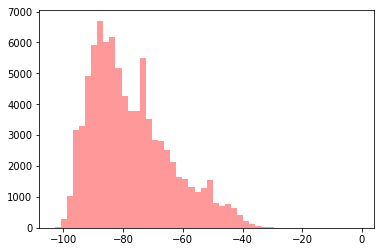

In [96]:
X_train_B2 = df_B2.iloc[:,:520]
X_train_B2 = X_train_B2[X_train_B2.std()[X_train_B2.std()!=0].index]
X_train_B2 = (X_train_B2.replace(to_replace=100,value=np.nan))
X_train_B2 = X_train_B2.stack(dropna=False)
sns.distplot(X_train_B2.dropna(),kde = False, color='red')

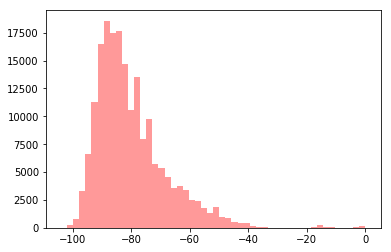

In [97]:
X_train_B3 = df_B3.iloc[:,:520]
X_train_B3 = X_train_B3[X_train_B3.std()[X_train_B3.std()!=0].index]
X_train_B3 = (X_train_B3.replace(to_replace=100,value=np.nan))
X_train_B3 = X_train_B3.stack(dropna=False)
sns.distplot(X_train_B3.dropna(),kde = False, color='red')